In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import plotly.express as px

In [2]:
df_std_2016 = pd.read_csv('df_std_2016.csv')

In [3]:
df_std_2016 = df_std_2016[df_std_2016['TYPE'] == 'Standard (1-way)']

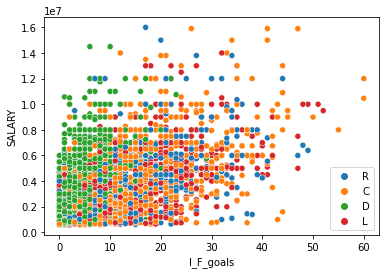

In [4]:
#Scatterplot
v = sns.scatterplot(x='I_F_goals',y='SALARY', data = df_std_2016, hue ='position')
v.legend(loc=0)

In [27]:
?pd.melt

In [34]:
import plotly.express as px
px.box(df_std_2016[['team','SALARY']].melt(id_vars=['team'], var_name = "col", value_name = 'Salary' ), x = "team", y='Salary', 
       facet_col='col').update_yaxes(matches=None)

In [12]:
#New Boxplot
import plotly.express as px
px.box(df_std_2016[['team','SALARY']].melt(id_vars=['team'], var_name = "col" ), x = "team", y='value', 
       color = 'team',facet_col='col').update_yaxes(matches=None)

In [15]:
corr_matrix

,season,playerId,games_played,icetime,shifts,onIce_xGoalsPercentage,offIce_xGoalsPercentage,penalties,faceoffsWon,penalityMinutes,...,CAP HIT %,AAV,SALARY,BASE SALARY,S.BONUS,P.BONUS,O6,EffTaxRate,L_Salary,xGoals_diff
season,1.000000,0.462280,-0.149636,-0.116531,-0.157359,0.017684,-0.008317,-0.088264,-0.045770,-0.086623,...,-0.024132,0.054035,0.000063,-0.057362,0.072825,-0.002351,0.010793,-0.042763,0.004946,0.018965
playerId,0.462280,1.000000,-0.114837,-0.126113,-0.144277,0.031578,-0.015372,-0.126704,-0.091196,-0.114786,...,-0.340095,-0.267271,-0.269645,-0.290437,-0.053428,-0.039994,-0.014933,-0.010816,-0.295443,0.034117
games_played,-0.149636,-0.114837,1.000000,0.877620,0.918826,0.266439,0.005180,0.561421,0.281373,0.498743,...,0.326092,0.316403,0.318598,0.327430,0.083077,-0.009802,-0.034432,-0.048089,0.380473,0.222770
icetime,-0.116531,-0.126113,0.877620,1.000000,0.978630,0.309793,-0.052041,0.541681,0.234172,0.442023,...,0.532072,0.524219,0.516174,0.502289,0.170340,-0.014819,-0.032950,-0.039964,0.570820,0.287039
shifts,-0.157359,-0.144277,0.918826,0.978630,1.000000,0.259271,-0.010129,0.552732,0.258170,0.461116,...,0.458719,0.447660,0.444019,0.450512,0.123154,-0.012662,-0.032225,-0.035447,0.512543,0.224097
onIce_xGoalsPercentage,0.017684,0.031578,0.266439,0.309793,0.259271,1.000000,-0.064054,0.149101,0.142581,0.092306,...,0.410580,0.419449,0.403860,0.325034,0.219442,0.010250,-0.029420,-0.075353,0.391808,0.876394
offIce_xGoalsPercentage,-0.008317,-0.015372,0.005180,-0.052041,-0.010129,-0.064054,1.000000,0.001671,-0.081647,0.018345,...,-0.197587,-0.200216,-0.189471,-0.154459,-0.100456,0.019388,-0.039248,-0.104397,-0.155280,-0.536742
penalties,-0.088264,-0.126704,0.561421,0.541681,0.552732,0.149101,0.001671,1.000000,0.092411,0.965909,...,0.226769,0.217137,0.218294,0.216481,0.066892,0.012632,-0.006492,-0.043199,0.258214,0.125256
faceoffsWon,-0.045770,-0.091196,0.281373,0.234172,0.258170,0.142581,-0.081647,0.092411,1.000000,0.062369,...,0.275842,0.262949,0.259944,0.209967,0.140282,-0.013929,-0.001388,-0.008970,0.236152,0.159952
penalityMinutes,-0.086623,-0.114786,0.498743,0.442023,0.461116,0.092306,0.018345,0.965909,0.062369,1.000000,...,0.148408,0.139674,0.144596,0.142221,0.045797,0.013539,-0.002677,-0.037672,0.177299,0.069190


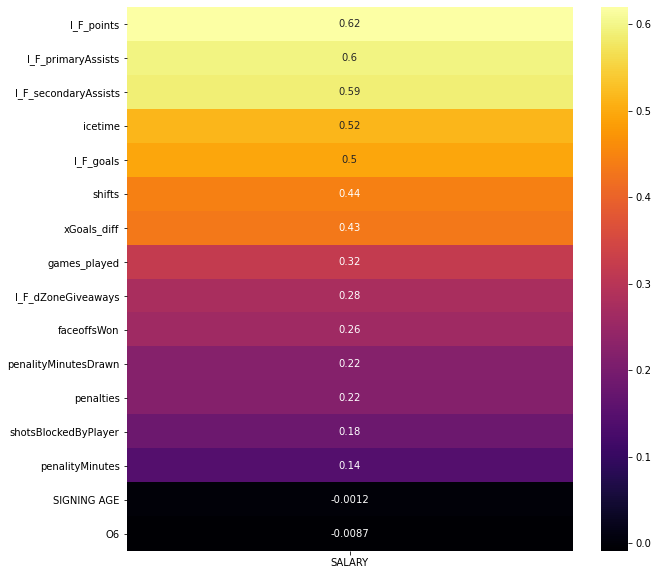

In [16]:
#Corr Matrix
corr_matrix = df_std_2016.corr()
updated = corr_matrix.iloc[np.r_[2,3,4,7:17,20,30,33],np.r_[26]]
updated.sort_values(by = 'SALARY', ascending = False, inplace=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(updated, annot=True, cmap = 'inferno') #kwags size to change text size
plt.show()

<AxesSubplot:xlabel='faceoffsWon', ylabel='SALARY'>

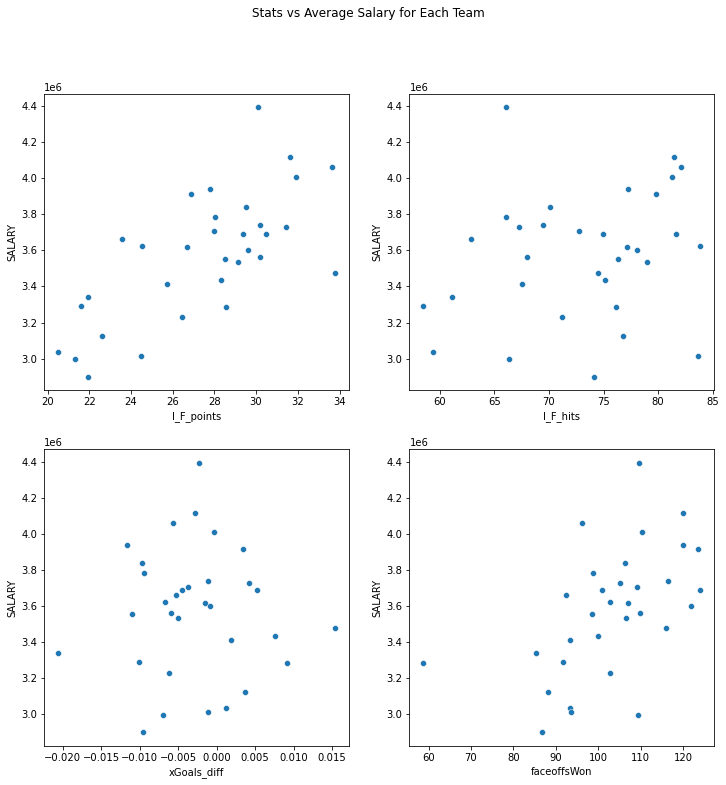

In [36]:
team = df_std_2016.groupby('team').mean()

fig, axes = plt.subplots(2,2, figsize=(12,12))                     
fig.suptitle('Stats vs Average Salary for Each Team')
sns.scatterplot(ax = axes[0,0], x='I_F_points',y='SALARY', data = team, legend = False)
sns.scatterplot(ax = axes[0,1], x='I_F_hits',y='SALARY', data = team, legend = False)
sns.scatterplot(ax = axes[1,0], x='xGoals_diff',y='SALARY', data = team, legend = False)
sns.scatterplot(ax = axes[1,1], x='faceoffsWon',y='SALARY', data = team,legend = False)